In [54]:
# Import libraries
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# data loading 

In [55]:
# Read the csv file 
df = pd.read_csv('Housing.csv')
print(df.shape)
df.head()

(545, 13)


,price,area,bedrooms,bathrooms,Floors,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   Floors            545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Preprocessing

In [57]:
# Missing values 
print(df.isnull().sum() / len(df))

# Duplicates
print("Num of Duplicates:", df.duplicated().sum())

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
Floors              0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64
Num of Duplicates: 0


In [58]:
df.drop(columns=['mainroad','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],inplace=True)


In [59]:
df.head(10)

,price,area,bedrooms,bathrooms,Floors,guestroom,parking
0,13300000,7420,4,2,3,no,2
1,12250000,8960,4,4,4,no,3
2,12250000,9960,3,2,2,no,2
3,12215000,7500,4,2,2,no,3
4,11410000,7420,4,1,2,yes,2
5,10850000,7500,3,3,1,no,2
6,10150000,8580,4,3,4,no,2
7,10150000,16200,5,3,2,no,0
8,9870000,8100,4,1,2,yes,2
9,9800000,5750,3,2,4,yes,1


In [60]:
df.describe()

,price,area,bedrooms,bathrooms,Floors,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      545 non-null    int64 
 1   area       545 non-null    int64 
 2   bedrooms   545 non-null    int64 
 3   bathrooms  545 non-null    int64 
 4   Floors     545 non-null    int64 
 5   guestroom  545 non-null    object
 6   parking    545 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 29.9+ KB


In [62]:
df['Floors'].value_counts()

2    238
1    227
4     41
3     39
Name: Floors, dtype: int64

In [ ]:
#If there is any null values you can fill
df['Floors'] = df['Floors'].fillna('parking')

In [ ]:
#Size of data set if missing any vlues or replace 
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [ ]:
#Missing values or replace it
df['bedrooms']=df['bedrooms'].fillna('bathrooms')

In [66]:
df['bathrooms'] = df['bathrooms'].fillna(df['bedrooms'].median())

In [ ]:
df.info()  #check  null values  in data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   price      545 non-null    int64 
 1   area       545 non-null    int64 
 2   bedrooms   545 non-null    int64 
 3   bathrooms  545 non-null    int64 
 4   Floors     545 non-null    int64 
 5   guestroom  545 non-null    object
 6   parking    545 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 29.9+ KB


In [68]:
df.drop(columns=['guestroom'],inplace=True)

In [ ]:
df[df.Floors >= 1]  #If you want search
df[df.price > 9870000] # we want this price house
df[df.bedrooms == 1] # want 1 bedrooms 
#df[df.stories == 2] # want 2 floors house
df[df.area < 2000] # area less than 2000 in house

,price,area,bedrooms,bathrooms,Floors,parking
271,4340000,1905,5,1,2,0
413,3430000,1950,3,2,2,0
449,3150000,1650,3,1,2,0
527,2275000,1836,2,1,1,0
530,2240000,1950,3,1,1,0
537,1890000,1700,3,1,2,0


In [70]:
df.describe()

,price,area,bedrooms,bathrooms,Floors,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [71]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

# cost of sq feet

In [72]:
df[df.bedrooms == 2] # single bedrooms price-per-sqft

,price,area,bedrooms,bathrooms,Floors,parking
61,7070000,8880,2,1,1,1
66,6930000,13200,2,1,1,1
73,6685000,6600,2,2,4,0
91,6419000,6750,2,1,1,2
114,6020000,6800,2,1,1,2
...,...,...,...,...,...,...
535,2100000,3360,2,1,1,1
538,1890000,3649,2,1,1,0
539,1855000,2990,2,1,1,1
540,1820000,3000,2,1,1,2


In [73]:
#find sqft of bathroom

square_feet_per_bathroom = (df['area'] / df['bathrooms'])
description = square_feet_per_bathroom.describe()
print(description)

count      545.000000
mean      4361.088379
std       2122.351542
min        870.000000
25%       3000.000000
50%       3792.000000
75%       5400.000000
max      15600.000000
dtype: float64


In [74]:
#find  sqft of parking

square_feet_per_parking = (df['area'] / df['parking'])
parking = square_feet_per_parking.describe()
print(parking)

count     545.0
mean        inf
std         NaN
min      1210.0
25%      4040.0
50%         NaN
75%         NaN
max         inf
dtype: float64


In [75]:
# 1-single bedrooms cost avg

single_bedroom_df = df[df['bedrooms'] == 1]
single_bedroom_cost = single_bedroom_df['price'].mean()


In [76]:
single_bedroom_cost

2712500.0

In [ ]:
# 2-bedrooms cost
# Find here max , mean,median(50%) ,ect....

single_bedroom_df = df[df['bedrooms'] == 2]
single_bedroom_cost = single_bedroom_df['price'].max()

single_bedroom_cost

7070000

In [ ]:
#You can find also 3,4,ect.... cost of bedrooms 

# find area

In [ ]:
#If you want find area
df['area'].unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [80]:
#max area highest 
df['area'].max()

16200

In [81]:
#min area least
df['area'].min()

1650

In [82]:
df['area'].median()

4600.0

In [83]:
#find percentage area 80% (0.8)
df['area'].quantile(0.8)

6600.0

In [84]:
# find max price
#max  highest price
df['price'].max()

13300000

In [85]:
# find min price
# min  highest price
df['price'].min()

1750000

In [86]:
df.describe()

,price,area,bedrooms,bathrooms,Floors,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [87]:

# Find the index of the house with the minimum total cost after
min_cost_index = df['price'].idxmin()

# Retrieve the row corresponding to the minimum cost index
house_with_min_cost = df.loc[min_cost_index]

# Display the information of the house with the minimum total cost after 
print(house_with_min_cost)

price        1750000
area            3620
bedrooms           2
bathrooms          1
Floors             1
parking            0
Name: 542, dtype: int64


In [ ]:

# Find the index of the house with the maximum  total cost after
max_cost_index = df['price'].idxmax()

# Retrieve the row corresponding to the maximum  cost index
house_with_max_cost = df.loc[max_cost_index]

# Display the information of the house with themaximum  total cost after 
print(house_with_max_cost)


price        13300000
area             7420
bedrooms            4
bathrooms           2
Floors              3
parking             2
Name: 0, dtype: int64


In [ ]:

try:
    house_cost = df.loc[11, 'price']
    print("Cost of the chosen house:", house_cost)
except KeyError: 
    print("No data found for the specified row. Please check the index.")


Cost of the chosen house: 9681000


In [90]:

# Define the price range
min_price = 5000000  # Minimum price
max_price = 10000000  # Maximum price

# Filter the DataFrame for houses within the price range
houses_in_price_range = df[(df['price'] >= min_price) & (df['price'] <= max_price)]
houses_in_price_range
 


,price,area,bedrooms,bathrooms,Floors,parking
8,9870000,8100,4,1,2,2
9,9800000,5750,3,2,4,1
10,9800000,13200,3,1,2,2
11,9681000,6000,4,3,2,2
12,9310000,6550,4,2,2,1
...,...,...,...,...,...,...
190,5040000,7600,4,1,2,2
191,5040000,10700,3,1,2,0
192,5040000,6600,3,1,1,0
193,5033000,4800,2,1,1,0


In [91]:
df.head()


,price,area,bedrooms,bathrooms,Floors,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


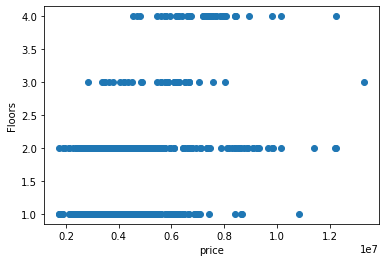

In [ ]:
# Plot the relationship between house cost and sale price
plt.scatter(df['price'], df['Floors'])
plt.xlabel('price')
plt.ylabel('Floors')
#plt.ylabel('price')
plt.show()


Text(0.5, 1.0, 'House Price vs area')

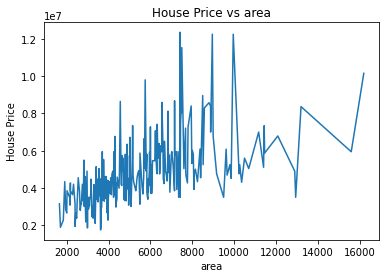

In [ ]:

df.groupby('area')['price'].median().plot()
plt.xlabel('area')
plt.ylabel('House Price')
plt.title("House Price vs area")

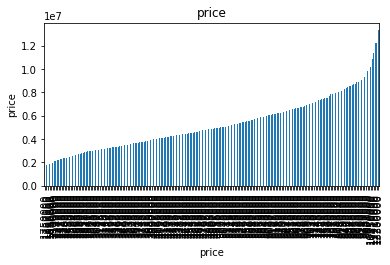

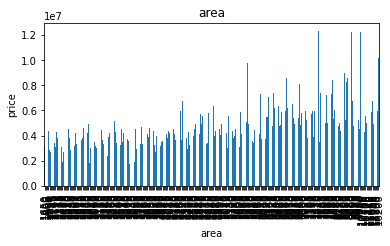

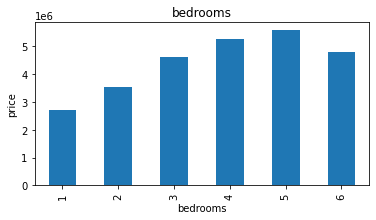

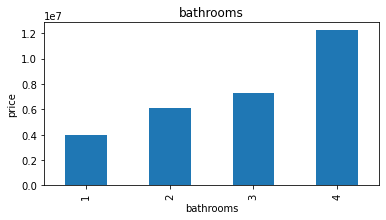

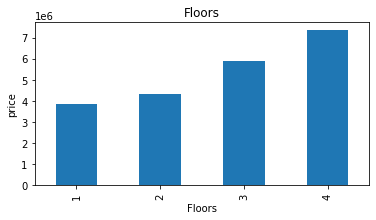

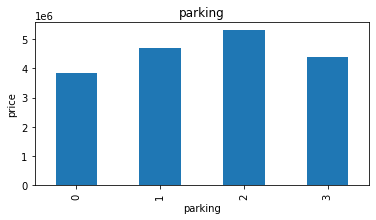

In [ ]:
#feature
#Lets Find the realtionship between them and Sale PRice
counter = 0
for feature in df:
    if counter == 6:
        break
    df=df.copy()
    plt.figure(figsize=(6,3)) 
    df.groupby(feature)['price'].median().plot.bar()
    plt.xlabel( feature )
    plt.ylabel('price')
    plt.title(feature)
    
    plt.show()
    counter += 1

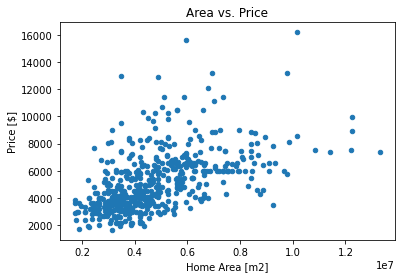

In [95]:
df.plot(kind="scatter", x="price", y="area", xlabel="Home Area [m2]", ylabel="Price [$]", title="Area vs. Price");

In [96]:
df.head()

,price,area,bedrooms,bathrooms,Floors,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


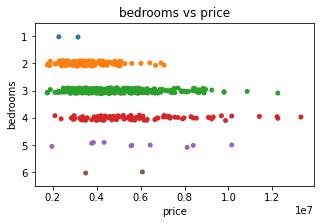

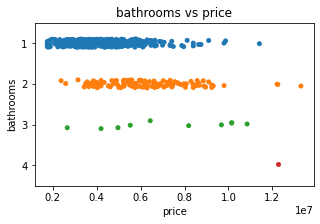

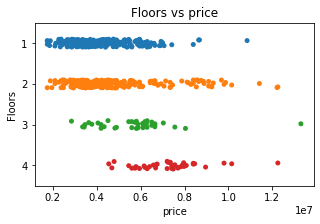

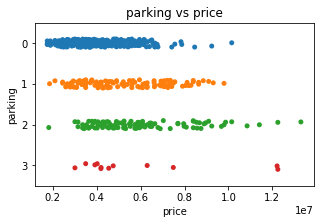

In [97]:
x_col = "price"
y_columns = ["bedrooms","bathrooms","Floors","parking"]

for y_col in y_columns:
    fig,ax=plt.subplots(figsize=(5,3))
    sns.stripplot(df[x_col],df[y_col], orient="h" ,ax=ax)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("{} vs {}".format(y_col, x_col))
    
    plt.show();

# visualizing

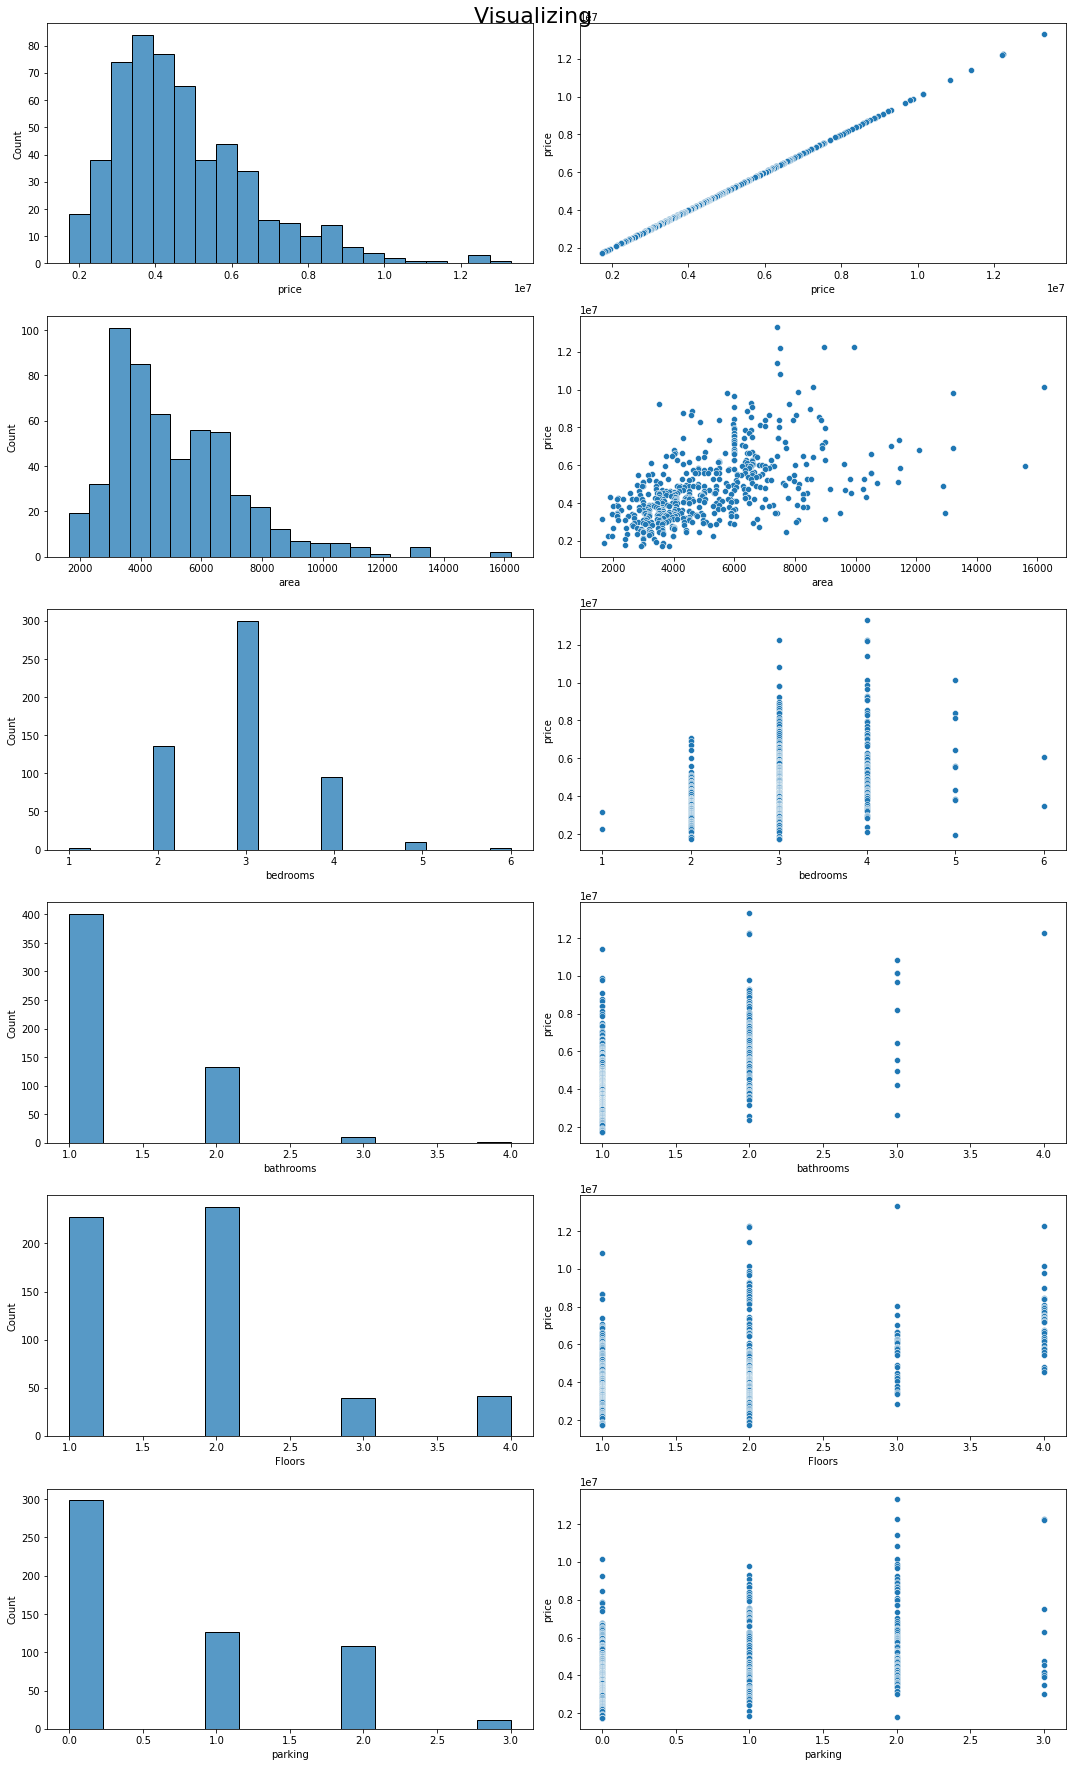

In [98]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
plt.suptitle("Visualizing ", size=22)
for index, col in enumerate(df.columns):
    if df[col].dtype == "object":
        sns.countplot(data=df, x=col, ax=ax[index, 0])
        if "price" in df.columns:
            sns.boxplot(data=df, x=col, y="price", ax=ax[index, 1])
    elif df[col].dtype in ["int64", "float64"]:
        sns.histplot(data=df, x=col, ax=ax[index, 0])
        if "price" in df.columns:
            sns.scatterplot(data=df, x=col, y="price", ax=ax[index, 1])
plt.tight_layout()
plt.show()


In [99]:
lb = LabelEncoder ()

cat_data = ['bedrooms','bathrooms','Floors','parking']
for i in cat_data:
    df[i] = lb.fit_transform(df[i])

df.head()


,price,area,bedrooms,bathrooms,Floors,parking
0,13300000,7420,3,1,2,2
1,12250000,8960,3,3,3,3
2,12250000,9960,2,1,1,2
3,12215000,7500,3,1,1,3
4,11410000,7420,3,0,1,2


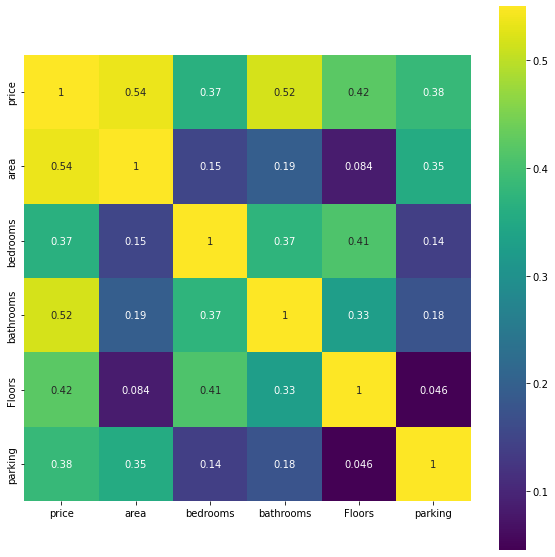

In [100]:


# Correlation
correlation = df.corr()
plt.figure(figsize=(10,10))
plt.title='Correlation Matrix'
sns.heatmap(correlation, vmax=0.55, square=True,annot=True,cmap='viridis');

# Applying Linear Regression

In [ ]:
#Mathematics of Linear Regression
from sklearn.linear_model import LinearRegression
X = df[['area']]  # Feature: area
y = df['price']   # Target variable: price
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_  # Intercept
# Print the regression equation
print("Regression equation: Y =", slope, "* X +", intercept)


Regression equation: Y = 461.9748942727834 * X + 2387308.4823964303


In [102]:
# Features-target split
target = "price"
y = df[target]
X = df.drop(columns= target)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 5)
y_train shape: (436,)
X_test shape: (109, 5)
y_test shape: (109,)


In [103]:
y_mean= y_train.mean()
y_pred_baseline =[y_mean] * len(y_train)
print("Mean House Price:", round(y_mean, 2))
print("Baseline MAE:", round(mean_absolute_error(y_train, y_pred_baseline)),0)

Mean House Price: 4706527.39
Baseline MAE: 1350726 0


In [104]:
model = LinearRegression()
model.fit(X_train,y_train)
LinearRegression()
y_pred_training = model.predict(X_train)
y_pred_testing = model.predict(X_test)
print("\nLinear Regression Model\n")
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))
print("Test MAE:", mean_absolute_error(y_test, y_pred_testing))


Linear Regression Model

Training MAE: 853544.1615161198
Test MAE: 1127483.3523235186
